0.439012714461 0.166015625


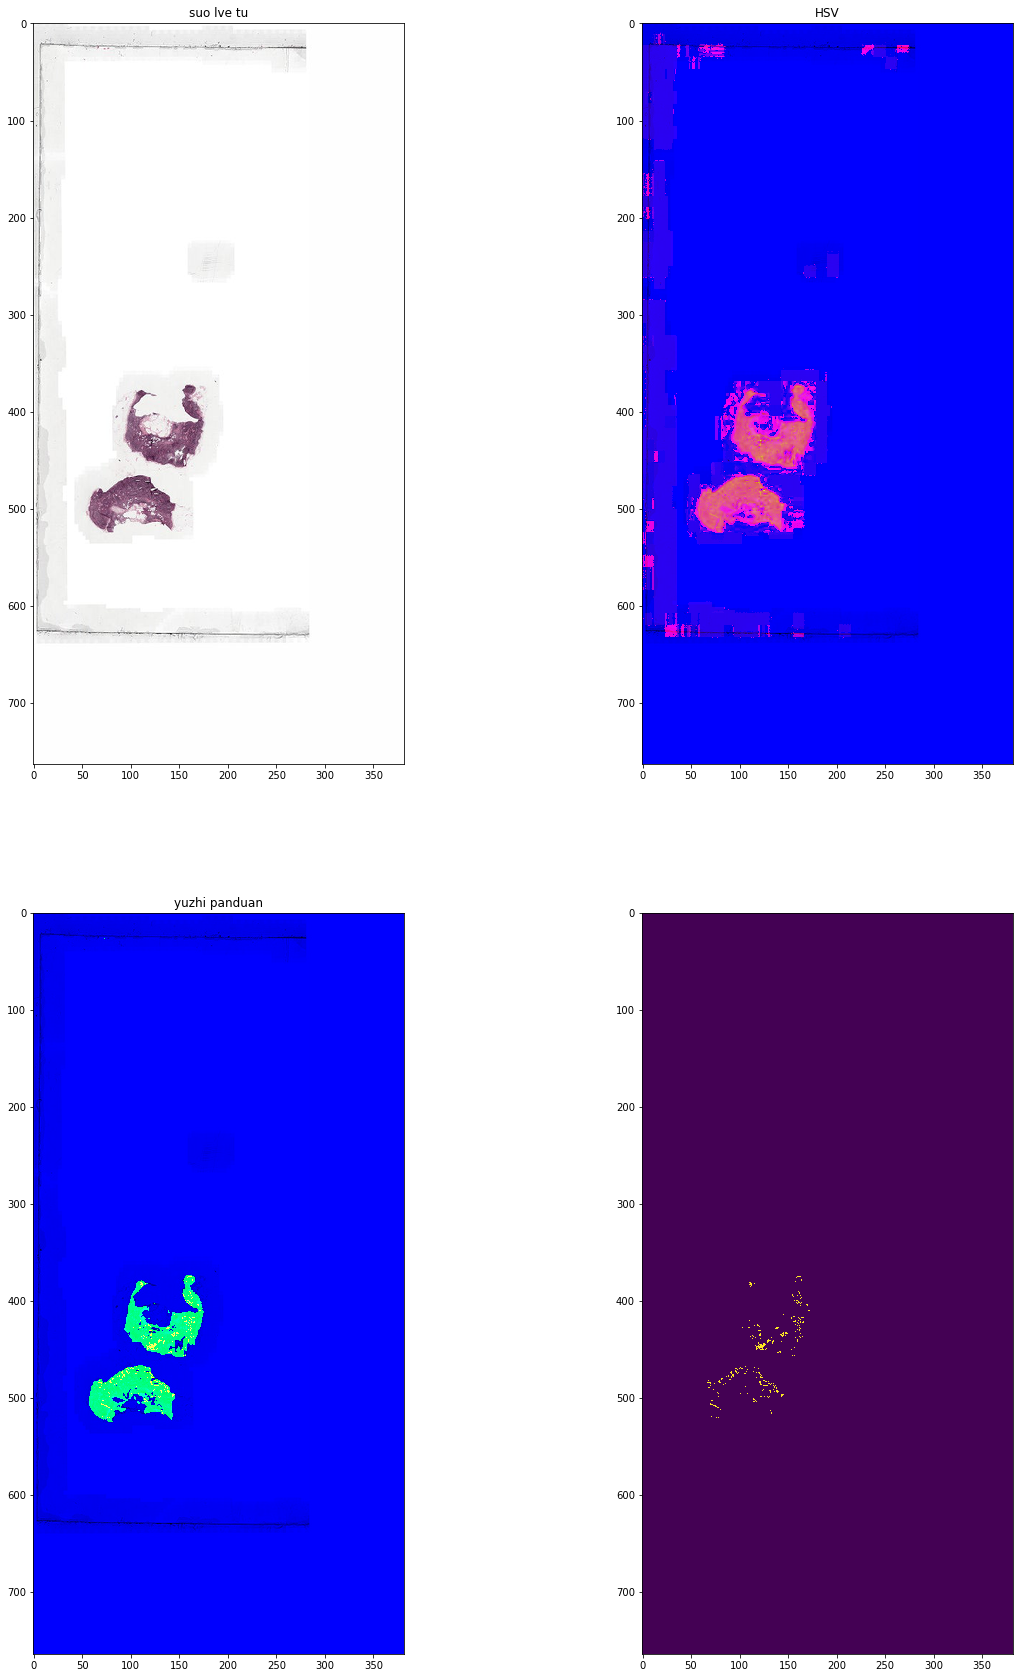

In [15]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.morphology import disk

import openslide
import numpy as np

f,axes = plt.subplots(2,2,figsize=(20,30))
ax = axes.ravel()

slide_path = "Tumor_005.tif"
mask_path = "Tumor_005_Mask.tif"
slide = openslide.open_slide(slide_path)
mask = openslide.open_slide(mask_path)

slide_tn = slide.get_thumbnail((slide.dimensions[0]/256,slide.dimensions[1]/256))
mask_tn = mask.get_thumbnail((mask.dimensions[0]/256,mask.dimensions[1]/256))
img = slide_tn
ax[0].imshow(img)
ax[0].set_title('suo lve tu')

img = color.rgb2hsv(img)
ax[1].imshow(img)
ax[1].set_title('HSV')

threshold_h = threshold_otsu(img[:,:,0])
threshold_s = threshold_otsu(img[:,:,1])

print(threshold_h,threshold_s)

mask_h = img[:,:,1] > threshold_h
mask_s = img[:,:,1] > threshold_s

img[:,:,0] = mask_h.astype(np.uint8)
img[:,:,1] = mask_s.astype(np.uint8)

ax[2].imshow(img)
ax[2].set_title('yuzhi panduan')

mask = (mask_h & mask_s).astype(np.uint8)

img[:,:,0] = mask
img[:,:,1] = mask
img[:,:,2] = mask

# f,axes = plt.subplots(1,2,figsize=(20,20))
# ax = axes.ravel()

ax[3].imshow(mask)
f